```{thebe-init}
---
thebe: true
---
```

# Exemplo de Aplicação: Técnica de Valor Agregado em Projetos

Este notebook utiliza dados de um projeto para calcular indicadores de desempenho baseados no método de **Valor Agregado (Earned Value Management)**. Os principais passos são:

1. Carregar os dados do projeto de um arquivo CSV.
2. Calcular os valores planejados (VP), reais (VR) e os indicadores de desempenho:
   - Variação de Prazo (VPr)
   - Variação de Custo (VC)
   - Índice de Desempenho de Prazo (IDP)
   - Índice de Desempenho de Custo (IDC)
3. Gerar gráficos que demonstrem as métricas de valor agregado ao longo do tempo.

Vamos começar!

## Passo 1: Carregar os dados do projeto
Os dados do projeto podem ser armazenados em um arquivo, tais como `projeto.csv` exemplicado abaixo. Neste caso, o formato esperado é o seguinte:

```csv
Atividades,Duração Planejada,Custos Planejados (CP),Custos Reais (CR),Valor Agregado (VA)
A,5,500,450,475
B,3,300,320,290
C,4,400,380,350
D,6,600,650,590
E,2,200,220,190
```
No exemplo seguinte, para facilitar a execução os dados foram colocados diretamente no código.Usaremos a biblioteca `pandas` para carregar e transformar esses dados em um *dataframe*.

In [1]:
import pandas as pd
import io

# Carregar os dados do arquivo CSV
#data = pd.read_csv('../data/projeto.csv')

# Dados CSV
data = """Atividades,Duração Planejada,Custos Planejados (CP),Custos Reais (CR),Valor Agregado (VA)
A,5,500,450,475
B,3,300,320,290
C,4,400,380,350
D,6,600,650,590
E,2,200,220,190"""

# Criar DataFrame
data = pd.read_csv(io.StringIO(data))

data

,Atividades,Duração Planejada,Custos Planejados (CP),Custos Reais (CR),Valor Agregado (VA)
0,A,5,500,450,475
1,B,3,300,320,290
2,C,4,400,380,350
3,D,6,600,650,590
4,E,2,200,220,190


## Passo 2: Calcular Indicadores de Valor Agregado
### Fórmulas Utilizadas
1. **Valores Planejados (VP)** = Duração Planejada × Custos Planejados (CP)
2. **Valores Reais (VR)** = Duração Planejada × Custos Reais (CR)
3. **Variação de Prazo (VPr)** = Valor Agregado (VA) - Valores Planejados (VP)
4. **Variação de Custo (VC)** = Valor Agregado (VA) - Custos Reais (CR)
5. **Índice de Desempenho de Prazo (IDP)** = Valor Agregado (VA) / Valores Planejados (VP)
6. **Índice de Desempenho de Custo (IDC)** = Valor Agregado (VA) / Custos Reais (CR)

In [5]:
# Calcular os indicadores
data['Valores Planejados (VP)'] = data['Duração Planejada'] * data['Custos Planejados (CP)']
data['Valores Reais (VR)'] = data['Duração Planejada'] * data['Custos Reais (CR)']
data['Variação de Prazo (VPr)'] = data['Valor Agregado (VA)'] - data['Valores Planejados (VP)']
data['Variação de Custo (VC)'] = data['Valor Agregado (VA)'] - data['Custos Reais (CR)']
data['Índice de Desempenho de Prazos (IDP)'] = data['Valor Agregado (VA)'] / data['Valores Planejados (VP)']
data['Índice de Desempenho de Custos (IDC)'] = data['Valor Agregado (VA)'] / data['Custos Reais (CR)']

# Exibir os resultados
data

,Atividades,Duração Planejada,Custos Planejados (CP),Custos Reais (CR),Valor Agregado (VA),Valores Planejados (VP),Valores Reais (VR),Variação de Prazo (VPr),Variação de Custo (VC),Índice de Desempenho de Prazos (IDP),Índice de Desempenho de Custos (IDC)
0,A,5,500,450,475,2500,2250,-2025,25,0.190000,1.055556
1,B,3,300,320,290,900,960,-610,-30,0.322222,0.906250
2,C,4,400,380,350,1600,1520,-1250,-30,0.218750,0.921053
3,D,6,600,650,590,3600,3900,-3010,-60,0.163889,0.907692
4,E,2,200,220,190,400,440,-210,-30,0.475000,0.863636


## Passo 3: Gerar Gráficos
### Gráfico 1: Comparação entre VP, VR e VA
Este gráfico mostra os Valores Planejados, Reais e o Valor Agregado para cada atividade.

Gráfico salvo como grafico_valor_agregado.png


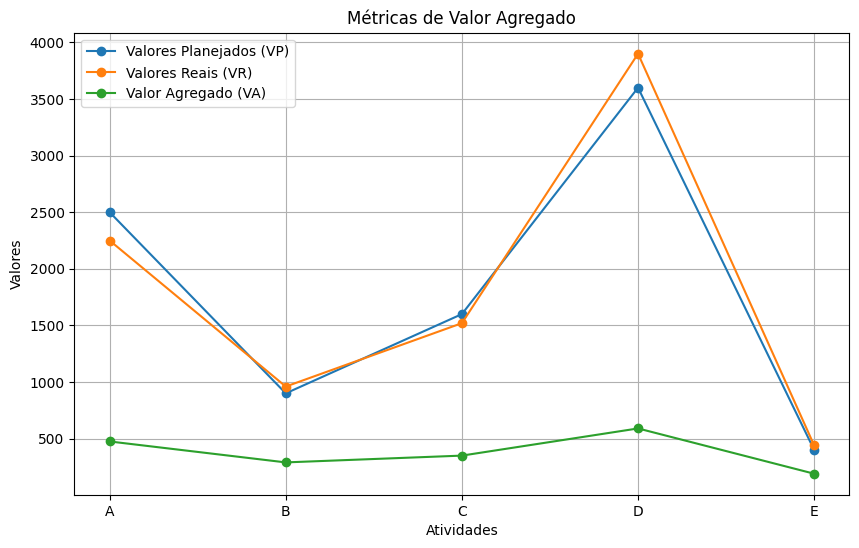

In [6]:
import matplotlib.pyplot as plt

# Gráfico de VP, VR e VA
plt.figure(figsize=(10, 6))
plt.plot(data['Atividades'], data['Valores Planejados (VP)'], label='Valores Planejados (VP)', marker='o')
plt.plot(data['Atividades'], data['Valores Reais (VR)'], label='Valores Reais (VR)', marker='o')
plt.plot(data['Atividades'], data['Valor Agregado (VA)'], label='Valor Agregado (VA)', marker='o')
plt.title('Métricas de Valor Agregado')
plt.xlabel('Atividades')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.savefig('../figures/grafico_valor_agregado.png')
print("Gráfico salvo como grafico_valor_agregado.png")
plt.show()

### Gráfico 2: Índices de Desempenho (IDP e IDC)
Este gráfico mostra os índices de desempenho de prazo e custo para cada atividade.

Gráfico salvo como grafico_desempenho.png


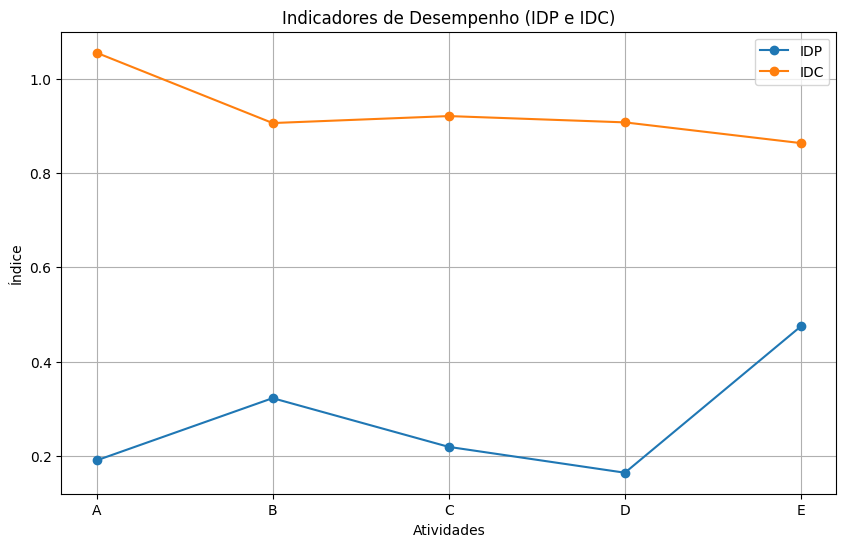

In [7]:
# Gráfico de IDP e IDC
plt.figure(figsize=(10, 6))
plt.plot(data['Atividades'], data['Índice de Desempenho de Prazos (IDP)'], label='IDP', marker='o')
plt.plot(data['Atividades'], data['Índice de Desempenho de Custos (IDC)'], label='IDC', marker='o')
plt.title('Indicadores de Desempenho (IDP e IDC)')
plt.xlabel('Atividades')
plt.ylabel('Índice')
plt.legend()
plt.grid()
plt.savefig('../figures/grafico_desempenho.png')
print("Gráfico salvo como grafico_desempenho.png")
plt.show()

## Conclusão
Este notebook demonstrou como calcular indicadores de valor agregado para análise de desempenho de projetos e como visualizá-los em gráficos. Os resultados podem ser utilizados para identificar atrasos, desvios de custo e oportunidades de melhoria no gerenciamento de projetos.